In [2]:
import pandas as pd
teachers = pd.read_csv('teachers.csv')
teachers.head()

,Unnamed: 0,full_name,birth_date,alma_mater,department,degree,knowledge_score,teaching_score,communication_skill,easiness_score,overall_score
0,0,Иванов Юрий Григорьевич,NaN,NaN,Военная кафедра,NaN,5.0,5.0,5.0,5.0,5.0
1,1,Кваченко Андрей Владимирович,NaN,Тамбовское ВВАУЛ им. М. М. Расковой,Военная кафедра,кандидат технических наук,3.5,3.0,2.5,3.5,3.5
2,2,Корнеев Виктор Александрович,NaN,NaN,Военная кафедра,NaN,5.0,5.0,5.0,4.0,5.0
3,3,Летуновский Сергей Владимирович,NaN,NaN,Военная кафедра,NaN,3.0,3.0,3.0,2.0,3.0
4,4,Пешев Андрей Леонидович,NaN,NaN,Военная кафедра,NaN,0.0,0.0,0.0,0.0,0.0


In [3]:
teachers["department"].unique()

array(['Военная кафедра', 'Высшая школа системного инжиниринга',
       'Департамент молекулярной и биологической физики',
       'Кафедра «Алгоритмы и технологии программирования»',
       'Кафедра «Анализ данных»', 'Кафедра «Дискретная математика»',
       'Кафедра «Интеллектуальные системы»',
       'Кафедра аэрофизического эксперимента и информационно-измерительных систем',
       'Кафедра вакуумной электроники',
       'Кафедра волновых процессов и систем управления',
       'Кафедра высшей математики', 'Кафедра вычислительной физики',
       'Кафедра газовой динамики, горения и теплообмена',
       'Кафедра иностранных языков', 'Кафедра информатики',
       'Кафедра информационных бизнес систем', 'Кафедра истории',
       'Кафедра истории культуры', 'Кафедра компьютерного моделирования',
       'Кафедра космической физики', 'Кафедра культурологии',
       'Кафедра математических основ управления',
       'Кафедра механики сплошных сред',
       'Кафедра микропроцессорных технолог

Описание данных:

- `full_name` (`str`) - Полное имя
- `birth_date` (`str`) - Дата рождения
- `alma_mater` (`str`) - Альма матер
- `department` (`str`) - Кафедра
- `degree` (`str`) - Ученая степень
- `knowledge_score` (`float`) - Знания
- `teaching_score` (`float`) - Умение преподавать	
- `communication_score` (`float`) - В общении	
- `easiness_score` (`float`) - «Халявность»	
- `overall_score` (`float`) - Общая оценка

In [4]:
teachers.shape

(1274, 11)

## Кластеризуем преподавателей по оценкам

In [5]:
x_train = teachers[['knowledge_score', 'teaching_score', 'communication_skill', 'easiness_score', 'overall_score']]
x_train = x_train.dropna()

In [6]:
x_train.shape

(1254, 5)

### Смотрим на данные

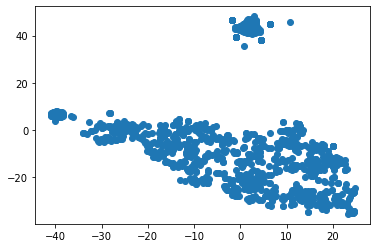

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

reduced_data = TSNE().fit_transform(x_train)
reduced_x = reduced_data[:, 0]
reduced_y = reduced_data[:, 1]

plt.scatter(reduced_x, reduced_y)

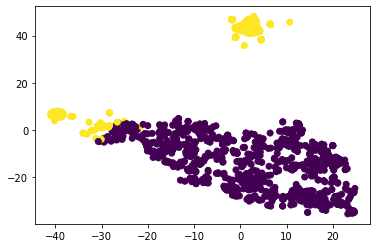

In [9]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=2, max_iter=1000)
cluster_labels = clusterer.fit_predict(x_train)
plt.scatter(reduced_x, reduced_y, c = cluster_labels)

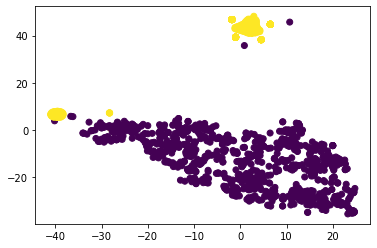

In [18]:
from sklearn.mixture import GaussianMixture

clusterer = GaussianMixture(n_components=2, tol=0.0000001, max_iter=1000)
cluster_labels = clusterer.fit_predict(x_train)
plt.scatter(reduced_x, reduced_y, c = cluster_labels)